Shallow NN -> only one hidden layer
Deep NN -> more than one hidden layer

torchvision package is for datasets

In [55]:
import numpy as np

In [56]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [57]:
training_data = datasets.FashionMNIST(
    root="data", # <--- this means "save in a folder called 'data'"
    train=True,
    download=True,
    transform=ToTensor(),
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

#wrap data in dataloader
train_dataloader =  DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

In [58]:
images, labels = next(iter(train_dataloader))
print(images.shape)

image, label = training_data[0]
# print(image)
print(image.shape)
print(label)

torch.Size([64, 1, 28, 28])
torch.Size([1, 28, 28])
9


the 1 in [1,28,28] is the number of channels

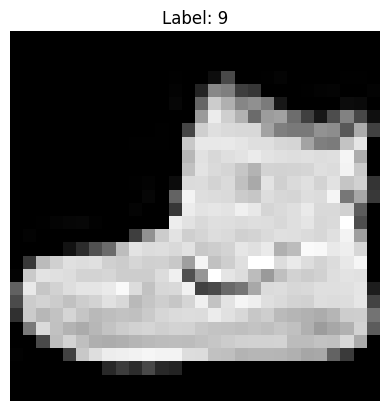

In [59]:
import matplotlib.pyplot as plt

image, label = training_data[0]

# Remove the channel dimension for plotting (1, 28, 28) → (28, 28)
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"Label: {label}")
plt.axis("off")  
plt.show()


## Simple Neural Network

we will have to flatten the image and dense fully connected and the softmax in the end 

In [60]:
class NeuralNetwork(nn.Module): #subclassing nn.Module
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten() #flattening the image
        self.linear_stack = nn.Sequential(
            nn.Linear(28*28, 10), #input layer
            # nn.Linear(28*28, 128), #input layer
            # nn.ReLU(),
            # nn.Linear(128, 10), #second layer
            nn.ReLU(),
            nn.Softmax(dim=1), #hidden layer
        )

    def forward(self, x): #forward pass
        x = self.flatten(x)
        logits = self.linear_stack(x)
        return logits


In [61]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train() #set model to training mode
    for batch, (X,y) in enumerate(dataloader):
        # compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step() #update weights
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval() #set model to evaluation mode
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


In [62]:
model =  NeuralNetwork()

learning_rate = 1e-3
epochs = 5
loss_fn = nn.CrossEntropyLoss() #loss function
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) #stochastic gradient descent

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.303067 [    0/60000]
loss: 2.301851 [ 6400/60000]
loss: 2.303126 [12800/60000]
loss: 2.300195 [19200/60000]
loss: 2.302433 [25600/60000]
loss: 2.294687 [32000/60000]
loss: 2.292063 [38400/60000]
loss: 2.287810 [44800/60000]
loss: 2.287885 [51200/60000]
loss: 2.286772 [57600/60000]
Test Error: 
 Accuracy: 22.0%, Avg loss: 2.289911 

Epoch 2
-------------------------------
loss: 2.283913 [    0/60000]
loss: 2.293294 [ 6400/60000]
loss: 2.286289 [12800/60000]
loss: 2.288443 [19200/60000]
loss: 2.298181 [25600/60000]
loss: 2.269443 [32000/60000]
loss: 2.268938 [38400/60000]
loss: 2.257067 [44800/60000]
loss: 2.261197 [51200/60000]
loss: 2.260507 [57600/60000]
Test Error: 
 Accuracy: 25.2%, Avg loss: 2.268952 

Epoch 3
-------------------------------
loss: 2.253229 [    0/60000]
loss: 2.279170 [ 6400/60000]
loss: 2.259092 [12800/60000]
loss: 2.268875 [19200/60000]
loss: 2.289553 [25600/60000]
loss: 2.236125 [32000/60000]
loss: 2.235352 [38400/

Test Error: 
 Accuracy: 53.6%, Avg loss: 2.079146 

 